# Explore the Pachon / Gemini South DIMM data

## Jupyter boilerplate

In [40]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
import os
from collections import namedtuple
from functools import partial
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import dateutil
import psycopg2
import colorcet
from scipy.constants import golden
from statsmodels.graphics.gofplots import qqplot

from astropy.coordinates import EarthLocation

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

mpl.rcParams['figure.figsize'] = (30, 5)
plt.style.use('ggplot')

In [2]:
note_dir = '/data/des70.a/data/neilsen/obs_strat/doc/seeing/note'
data_dir = '../../data'

## Load the DIMM data

In [3]:
dimm = pd.read_hdf(os.path.join(data_dir, 'Pachon_DIMM_to_2019-10-07.h5'))
dimm.head()

,time,hr,fwhm,flux,strehlL,strehlR,mjd,month,year,data_month,night,am,strehl,strehl_frac_diff,r0,log_r0,solar_zd
t,,,,,,,,,,,,,,,,,
2004-03-17 02:33:15+00:00,2004-03-17 02:33:15+00:00,4763,0.71,466228,0.0,0.0,53081.106424,3,2004,3,53081,False,0.0,NaN,0.142352,-0.846637,134.478719
2004-03-17 02:34:35+00:00,2004-03-17 02:34:35+00:00,4763,0.74,470195,0.0,0.0,53081.107350,3,2004,3,53081,False,0.0,NaN,0.136581,-0.864611,134.707136
2004-03-17 02:35:42+00:00,2004-03-17 02:35:42+00:00,4763,0.74,460268,0.0,0.0,53081.108125,3,2004,3,53081,False,0.0,NaN,0.136581,-0.864611,134.897625
2004-03-17 02:36:49+00:00,2004-03-17 02:36:49+00:00,4763,0.75,462758,0.0,0.0,53081.108900,3,2004,3,53081,False,0.0,NaN,0.134760,-0.870440,135.087365
2004-03-17 02:37:58+00:00,2004-03-17 02:37:58+00:00,4763,0.72,457338,0.0,0.0,53081.109699,3,2004,3,53081,False,0.0,NaN,0.140375,-0.852711,135.281977


In [4]:
dimm.tail()

,time,hr,fwhm,flux,strehlL,strehlR,mjd,month,year,data_month,night,am,strehl,strehl_frac_diff,r0,log_r0,solar_zd
t,,,,,,,,,,,,,,,,,
2019-10-07 09:27:01+00:00,2019-10-07 09:27:01+00:00,2294,0.546,16451,0.318,0.519,58763.393762,10,2019,190,58763,True,0.4185,0.480287,0.185109,-0.732571,100.877917
2019-10-07 09:28:04+00:00,2019-10-07 09:28:04+00:00,2294,0.574,15658,0.314,0.515,58763.394491,10,2019,190,58763,True,0.4145,0.484922,0.176080,-0.754291,100.656648
2019-10-07 09:29:07+00:00,2019-10-07 09:29:07+00:00,2294,0.481,16000,0.311,0.534,58763.395220,10,2019,190,58763,True,0.4225,0.527811,0.210124,-0.677524,100.435255
2019-10-07 09:30:10+00:00,2019-10-07 09:30:10+00:00,2294,0.528,16457,0.321,0.523,58763.395949,10,2019,190,58763,True,0.4220,0.478673,0.191420,-0.718013,100.213740
2019-10-07 09:31:07+00:00,2019-10-07 09:31:07+00:00,2294,0.478,16484,0.303,0.526,58763.396609,10,2019,190,58763,True,0.4145,0.537998,0.211443,-0.674807,100.013217


## Load DECam seeing data for comparison

In [5]:
decam = pd.read_hdf(os.path.join(data_dir, 'decam_seeing.h5'))

Get rid of bad values

In [6]:
decam = decam[~ np.isnan(decam.seeing)]

We want a `data_month` value that corresponds to the DIMM data month, no the DECam data month.

In [7]:
decam['data_month'] = 12*(decam.year - dimm.index.year.min()) + decam.month

In [8]:
decam.head()

,id,date,filter,airmass,qc_fwhm,corr,mjd,month,year,night,seeing,data_month
t,,,,,,,,,,,,
2012-12-12 01:27:21.949000+00:00,160509,2012-12-12 01:27:21.949000+00:00,r,1.23,1.09,0.927534,56273.060671,12,2012,56273,0.920832,108
2012-12-12 02:01:01.099401+00:00,160522,2012-12-12 02:01:01.099401+00:00,r,1.48,1.37,0.826147,56273.084041,12,2012,56273,1.069023,108
2012-12-12 02:23:28.874983+00:00,160541,2012-12-12 02:23:28.874983+00:00,g,1.62,1.57,0.739190,56273.099640,12,2012,56273,1.111837,108
2012-12-12 02:24:56.874680+00:00,160542,2012-12-12 02:24:56.874680+00:00,g,1.63,1.61,0.736354,56273.100658,12,2012,56273,1.138280,108
2012-12-12 02:26:25.908967+00:00,160543,2012-12-12 02:26:25.908967+00:00,g,1.64,1.76,0.733459,56273.101689,12,2012,56273,1.247979,108


## Calculate monthly statistics

In [9]:
def make_quant_fn(q):
    fn = partial(np.quantile, q=q)
    fn.__name__ = f'{int(100*q)}%'
    return fn

data_stats = [make_quant_fn(q) for q in (0.05, 0.25, 0.5, 0.75, 0.95)]

dimm_bymonth = dimm.groupby('data_month').agg({'month': 'median',
                                             'year': 'median',
                                             'time': ['min', 'max'],
                                             'fwhm': data_stats,
                                             'r0': data_stats,
                                             'log_r0': data_stats,
                                             'strehl': data_stats})
dimm_bymonth.head()

month   year                      time                            \
           median median                       min                       max   
data_month                                                                     
3               3   2004 2004-03-17 02:33:15+00:00 2004-03-26 10:10:39+00:00   
4               4   2004 2004-04-08 00:13:59+00:00 2004-04-21 03:20:35+00:00   
5               5   2004 2004-05-06 22:47:26+00:00 2004-05-29 09:11:58+00:00   
6               6   2004 2004-06-03 23:46:06+00:00 2004-06-30 23:59:40+00:00   
7               7   2004 2004-07-01 00:00:51+00:00 2004-07-20 04:09:19+00:00   

             fwhm                                r0  ...    log_r0            \
               5%   25%   50%   75%   95%        5%  ...        5%       25%   
data_month                                           ...                       
3           0.520  0.61  0.69  0.78  1.01  0.100069  ... -0.999700 -0.887473   
4           0.540  0.70  0.87  1.05  1.34  0.075425  ... -1.122484 -1.016568   
5           0.579  0.85  1.05  1.29  1.94  0.052098  ... -1.283181 -1.105968   
6           0.580  1.04  1.53  1.96  2.43  0.041592  ... -1.380985 -1.287635   
7           0.510  0.82  1.06  1.28  1.66  0.060885  ... -1.215487 -1.102589   

                                          strehl                         \
                 50%       75%       95%      5%    25%     50%     75%   
data_month                                                                
3          -0.834228 -0.780709 -0.711382  0.0000  0.000  0.0000  0.0000   
4          -0.934898 -0.840477 -0.727773  0.0000  0.000  0.0000  0.0000   
5          -1.016568 -0.924798 -0.758051  0.1975  0.282  0.3530  0.4125   
6          -1.180070 -1.012412 -0.758807  0.2275  0.263  0.2995  0.3600   
7          -1.020685 -0.909193 -0.702949  0.2540  0.348  0.4080  0.4435   

                     
                95%  
data_month           
3           0.00000  
4           0.00000  
5           0.47255  
6           0.43250  
7           0.48000  

[5 rows x 24 columns]

Now do something similar for DECam seeing data:

In [10]:
decam_bymonth = decam.groupby('data_month').agg({'month': 'median',
                                                 'year': 'median',
                                                 'date': ['min', 'max'],
                                                 'seeing': data_stats})
decam_bymonth.head()

month   year                             date  \
           median median                              min   
data_month                                                  
108            12   2012 2012-12-12 01:27:21.949000+00:00   
109             1   2013 2013-01-04 01:25:43.723141+00:00   
110             2   2013 2013-02-01 01:23:15.438657+00:00   
111             3   2013 2013-03-01 00:34:34.971388+00:00   
112             4   2013 2013-04-04 08:26:58.960567+00:00   

                                               seeing                      \
                                        max        5%       25%       50%   
data_month                                                                  
108        2012-12-30 08:23:47.079431+00:00  0.667860  0.769029  0.864609   
109        2013-01-31 04:51:44.455514+00:00  0.708133  0.830107  0.970538   
110        2013-02-28 08:23:49.007649+00:00  0.683199  0.784648  0.900333   
111        2013-03-30 07:52:24.880645+00:00  0.612124  0.713090  0.801397   
112        2013-04-30 08:09:13.727428+00:00  0.615141  0.759326  0.871920   

                                
                 75%       95%  
data_month                      
108         0.985510  1.231771  
109         1.161220  1.475472  
110         1.062820  1.362078  
111         0.922648  1.137759  
112         1.077033  1.637947

## Plot monthly statistics by month

/data/des70.a/data/neilsen/anaconda/envs/ehn37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


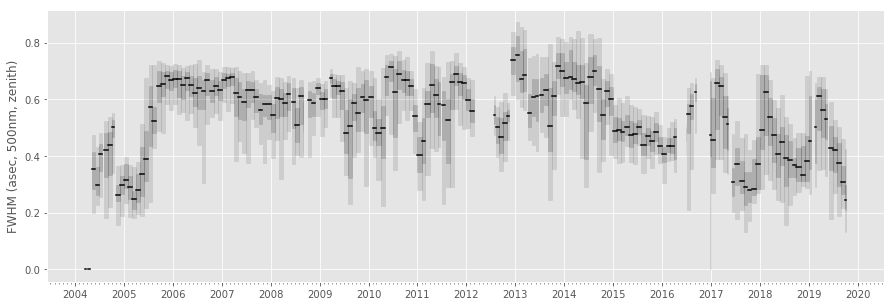

In [11]:
fig, ax = plt.subplots(1, figsize=(15, 5))
col = 'strehl'

for _, dimm_bymonth_seq in dimm_bymonth.groupby('data_month'):
    df = pd.concat([
        dimm_bymonth_seq.set_index(('time', 'min')).copy(),
        dimm_bymonth_seq.set_index(('time', 'max')).copy()
    ]).sort_index()

    ax.fill_between(df.index, df[(col, '5%')], df[(col, '95%')], color='k', alpha=0.10)
    ax.fill_between(df.index, df[(col, '25%')], df[(col, '75%')], color='k', alpha=0.15)
    ax.plot(df.index, df[(col, '50%')], color='k')
    ax.set_ylabel(col)
    
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())

ax.set_ylabel("FWHM (asec, 500nm, zenith)")
fig.savefig(os.path.join(note_dir, 'monthly_strehl_vs_year.png'), pdi=300, bbox_inches='tight')

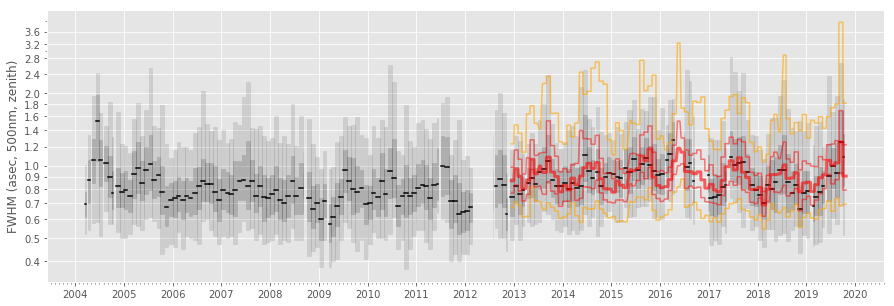

In [12]:
fig, ax = plt.subplots(1, figsize=(15, 5))
col = 'fwhm'

for _, dimm_bymonth_seq in dimm_bymonth.groupby('data_month'):
    df = pd.concat([
        dimm_bymonth_seq.set_index(('time', 'min')).copy(),
        dimm_bymonth_seq.set_index(('time', 'max')).copy()
    ]).sort_index()

    ax.fill_between(df.index, df[(col, '5%')], df[(col, '95%')], color='k', alpha=0.10)
    ax.fill_between(df.index, df[(col, '25%')], df[(col, '75%')], color='k', alpha=0.15)
    ax.plot(df.index, df[(col, '50%')], color='k')
    ax.set_ylabel(col)
    
ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator())

ax.set_yscale('log')
df = pd.concat([
    decam_bymonth.set_index(('date', 'min')).copy(),
    decam_bymonth.set_index(('date', 'max')).copy()
    ]).sort_index()
ax.plot(df.index, df[('seeing', '5%')], color='orange', alpha=0.6)
ax.plot(df.index, df[('seeing', '25%')], color='red', alpha=0.5)
ax.plot(df.index, df[('seeing', '50%')], color='red', alpha=0.6, linewidth=3)
ax.plot(df.index, df[('seeing', '75%')], color='red', alpha=0.5)
ax.plot(df.index, df[('seeing', '95%')], color='orange', alpha=0.6)

ax.set_yscale('log')
ax.set_yticks(list(np.arange(0.4, 1.0, 0.1)) + list(np.arange(1.0, 2.0, 0.2)) + list(np.arange(2.0, 4.0, 0.4)))
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_ylabel("FWHM (asec, 500nm, zenith)")
fig.savefig(os.path.join(note_dir, 'monthly_dimm_vs_year.png'), pdi=300, bbox_inches='tight')

## Plot DIMM against DECam seeing statistics

Combine the DIMM and DECam data frames:

In [13]:
seeing_bymonth = dimm_bymonth.merge(decam_bymonth)
seeing_bymonth.head()

month   year                      time                            fwhm  \
  median median                       min                       max    5%   
0     12   2012 2012-12-02 01:17:48+00:00 2012-12-31 08:51:49+00:00  0.49   
1      1   2013 2013-01-03 00:40:56+00:00 2013-01-31 06:25:39+00:00  0.57   
2      2   2013 2013-02-01 00:30:47+00:00 2013-02-28 09:47:09+00:00  0.49   
3      3   2013 2013-03-01 00:02:51+00:00 2013-03-19 09:54:09+00:00  0.56   
4      4   2013 2013-04-07 00:03:51+00:00 2013-04-30 02:59:57+00:00  0.58   

                                 r0  ...  strehl                    \
    25%   50%   75%   95%        5%  ...     50%      75%      95%   
0  0.62  0.74  0.89  1.16  0.087129  ...  0.7395  0.78600  0.83725   
1  0.70  0.82  0.97  1.33  0.075992  ...  0.7580  0.82450  0.87150   
2  0.63  0.76  0.92  1.26  0.080214  ...  0.6705  0.77050  0.85580   
3  0.68  0.79  0.90  1.12  0.090241  ...  0.6845  0.77750  0.84300   
4  0.73  0.85  0.98  1.23  0.082171  ...  0.5525  0.61975  0.74585   

                              date                                     seeing  \
                               min                              max        5%   
0 2012-12-12 01:27:21.949000+00:00 2012-12-30 08:23:47.079431+00:00  0.667860   
1 2013-01-04 01:25:43.723141+00:00 2013-01-31 04:51:44.455514+00:00  0.708133   
2 2013-02-01 01:23:15.438657+00:00 2013-02-28 08:23:49.007649+00:00  0.683199   
3 2013-03-01 00:34:34.971388+00:00 2013-03-30 07:52:24.880645+00:00  0.612124   
4 2013-04-04 08:26:58.960567+00:00 2013-04-30 08:09:13.727428+00:00  0.615141   

                                           
        25%       50%       75%       95%  
0  0.769029  0.864609  0.985510  1.231771  
1  0.830107  0.970538  1.161220  1.475472  
2  0.784648  0.900333  1.062820  1.362078  
3  0.713090  0.801397  0.922648  1.137759  
4  0.759326  0.871920  1.077033  1.637947  

[5 rows x 31 columns]

Plot the DIMM statistics againt the DECam ones, color coding the points by the Strehl ratio.

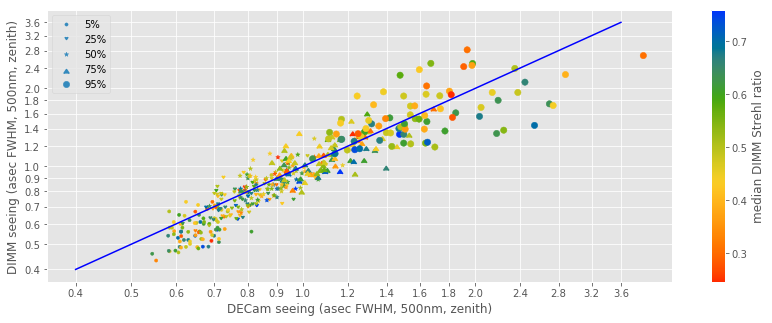

In [15]:
fig, ax = plt.subplots(1, figsize=(14, 5))
quants = ('5%', '25%', '50%', '75%', '95%')

quant_marks = {'5%': "o",
               '25%': 7,
               '50%': "*",
               '75%': 6,
               '95%': "o"}

size_scale = 10
seeing_ticks = np.concatenate([np.arange(0.4, 1.0, 0.1), np.arange(1.0, 2.0, 0.2), np.arange(2.0, 4.0, 0.4)])
seeing_bymonth['median DIMM Strehl ratio'] = seeing_bymonth[('strehl', '50%')]
seeing_bymonth.plot.scatter(('seeing', quants[0]), ('fwhm', quants[0]), c='median DIMM Strehl ratio',
                            s=size_scale, marker=quant_marks[quants[0]],
                            cmap=colorcet.cm.rainbow_r,
                            label=quants[0],
                            ax=ax)
for s, quant in enumerate(quants[1:]):
    ax.scatter(seeing_bymonth[('seeing', quant)], seeing_bymonth[('fwhm', quant)],
               c=seeing_bymonth[('strehl', '50%')],
               s=(s+1)*size_scale, marker=quant_marks[quant], label=quant,
               cmap=colorcet.cm.rainbow_r)

match_values = np.arange(0.4, 3.7, 0.1)
ax.plot(match_values, match_values, c='b')    
ax.set_ylabel('DIMM seeing (asec FWHM, 500nm, zenith)')
ax.set_yscale('log')
ax.set_yticks(seeing_ticks)
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.minorticks_off()
    
ax.set_xlabel('DECam seeing (asec FWHM, 500nm, zenith)')
ax.set_xscale('log')
ax.set_xticks(seeing_ticks)
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.minorticks_off()
    
ax.legend()
#plt.tight_layout()
fig.savefig(os.path.join(note_dir, 'dimm_vs_decam.png'), pdi=300, bbox_inches='tight')

In [16]:
seeing_bymonth.head()

month   year                      time                            fwhm  \
  median median                       min                       max    5%   
0     12   2012 2012-12-02 01:17:48+00:00 2012-12-31 08:51:49+00:00  0.49   
1      1   2013 2013-01-03 00:40:56+00:00 2013-01-31 06:25:39+00:00  0.57   
2      2   2013 2013-02-01 00:30:47+00:00 2013-02-28 09:47:09+00:00  0.49   
3      3   2013 2013-03-01 00:02:51+00:00 2013-03-19 09:54:09+00:00  0.56   
4      4   2013 2013-04-07 00:03:51+00:00 2013-04-30 02:59:57+00:00  0.58   

                                 r0  ...   strehl           \
    25%   50%   75%   95%        5%  ...      75%      95%   
0  0.62  0.74  0.89  1.16  0.087129  ...  0.78600  0.83725   
1  0.70  0.82  0.97  1.33  0.075992  ...  0.82450  0.87150   
2  0.63  0.76  0.92  1.26  0.080214  ...  0.77050  0.85580   
3  0.68  0.79  0.90  1.12  0.090241  ...  0.77750  0.84300   
4  0.73  0.85  0.98  1.23  0.082171  ...  0.61975  0.74585   

                              date                                     seeing  \
                               min                              max        5%   
0 2012-12-12 01:27:21.949000+00:00 2012-12-30 08:23:47.079431+00:00  0.667860   
1 2013-01-04 01:25:43.723141+00:00 2013-01-31 04:51:44.455514+00:00  0.708133   
2 2013-02-01 01:23:15.438657+00:00 2013-02-28 08:23:49.007649+00:00  0.683199   
3 2013-03-01 00:34:34.971388+00:00 2013-03-30 07:52:24.880645+00:00  0.612124   
4 2013-04-04 08:26:58.960567+00:00 2013-04-30 08:09:13.727428+00:00  0.615141   

                                          median DIMM Strehl ratio  
        25%       50%       75%       95%                           
0  0.769029  0.864609  0.985510  1.231771                   0.7395  
1  0.830107  0.970538  1.161220  1.475472                   0.7580  
2  0.784648  0.900333  1.062820  1.362078                   0.6705  
3  0.713090  0.801397  0.922648  1.137759                   0.6845  
4  0.759326  0.871920  1.077033  1.637947                   0.5525  

[5 rows x 32 columns]

It does not look like the match between the DIMM and DECam would be improved by filtering on the Strehl ratio.

## Look at statistics by night

In [37]:
dimm_bynight = dimm.groupby('night').agg({'month': 'median',
                                             'year': 'median',
                                             'fwhm': 'median',
                                             'strehl': 'median'})
dimm_bynight.rename(columns={'fwhm': 'dimm'}, inplace=True)

decam_bynight = decam.groupby('night').agg({'month': 'median',
                                            'year': 'median',
                                            'seeing': 'median'})
decam_bynight.rename(columns={'seeing': 'decam'}, inplace=True)

seeing_bynight = dimm_bynight.merge(decam_bynight)
seeing_bynight['strehl_bin'] = pd.cut(seeing_bynight['strehl'], np.arange(0.05, 0.95, 0.05))

seeing_bynight['seeing_ratio'] = seeing_bynight.decam/seeing_bynight.dimm
seeing_bynight['frac_diff'] = (seeing_bynight.decam-seeing_bynight.dimm)/seeing_bynight.decam
seeing_bynight.head()

,month,year,dimm,strehl,decam,strehl_bin,seeing_ratio,frac_diff
0,12,2012,0.57,0.79625,1.164803,"(0.75, 0.8]",2.043514,0.510647
1,12,2012,0.57,0.79625,0.837504,"(0.75, 0.8]",1.469305,0.319406
2,12,2012,0.57,0.79625,0.913835,"(0.75, 0.8]",1.603220,0.376255
3,12,2012,0.57,0.79625,0.832839,"(0.75, 0.8]",1.461122,0.315594
4,12,2012,0.57,0.79625,0.797762,"(0.75, 0.8]",1.399582,0.285501


Text(0.5, 0.98, '')

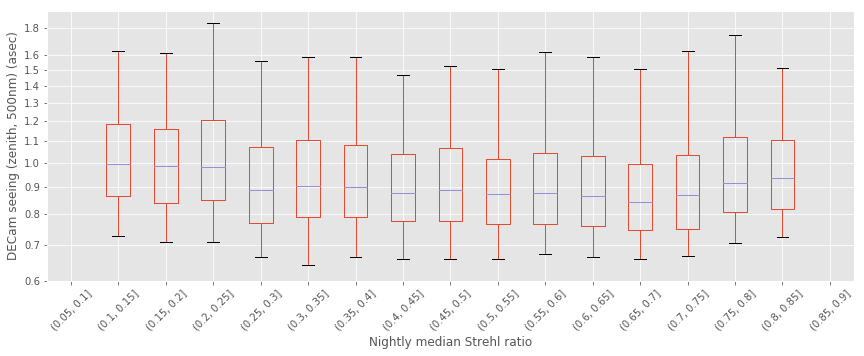

In [38]:
fig, ax = plt.subplots(1, figsize=(14, 5))
col = 'strehl_bin'
seeing_bynight.boxplot('decam', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_yscale('log')
ax.set_yticks(list(np.arange(0.6, 1.6, 0.1))+list(np.arange(1.6, 2.0, 0.2)))
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.minorticks_off()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("DECam seeing (zenith, 500nm) (asec)")
ax.set_xlabel("Nightly median Strehl ratio")
ax.set_title("")
fig.suptitle("")

Text(0.5, 0.98, '')

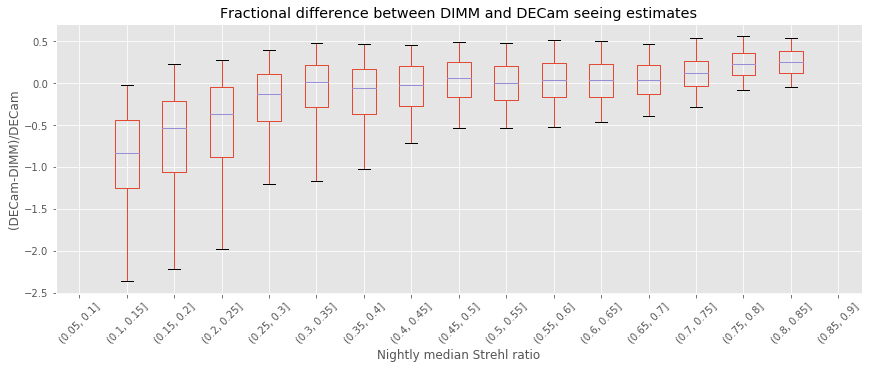

In [39]:
fig, ax = plt.subplots(1, figsize=(14, 5))
col = 'strehl_bin'
seeing_bynight.boxplot('frac_diff', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_xlabel("Strehl ratio")
ax.set_ylabel("Fractional difference in PSF width")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("(DECam-DIMM)/DECam")
ax.set_xlabel("Nightly median Strehl ratio")
ax.set_title("Fractional difference between DIMM and DECam seeing estimates")
fig.suptitle("")

## Statistics by hour

In [22]:
dimm['mjd_hour'] = np.floor(dimm.mjd*24)/24
dimm_byhour = dimm.groupby('mjd_hour').agg({'month': 'median',
                                             'year': 'median',
                                             'fwhm': 'median',
                                             'strehlL': 'median',
                                             'strehlR': 'median',
                                             'strehl': 'median'})
dimm_byhour.rename(columns={'fwhm': 'dimm'}, inplace=True)
print('Created dimm_byhour')

decam['mjd_hour'] = np.floor(decam.mjd*24)/24
decam_byhour = decam.groupby('mjd_hour').agg({'month': 'median',
                                            'year': 'median',
                                            'seeing': 'median'})
decam_byhour.rename(columns={'seeing': 'decam'}, inplace=True)
print('Created decam_byhour')

seeing_byhour = dimm_byhour.merge(decam_byhour)
print('Finished merge')
seeing_byhour['strehl_bin'] = pd.cut(seeing_byhour['strehl'], np.arange(0.05, 0.95, 0.05))
seeing_byhour['strehlL_bin'] = pd.cut(seeing_byhour['strehlL'], np.arange(0.05, 0.95, 0.05))
seeing_byhour['strehlR_bin'] = pd.cut(seeing_byhour['strehlR'], np.arange(0.05, 0.95, 0.05))
print('Created sthehl_bin')

seeing_byhour['seeing_ratio'] = seeing_byhour.decam/seeing_byhour.dimm
seeing_byhour['frac_diff'] = (seeing_byhour.decam-seeing_byhour.dimm)/seeing_byhour.decam
seeing_byhour.head()

Created dimm_byhour
Created decam_byhour
Finished merge
Created sthehl_bin


,month,year,dimm,strehlL,strehlR,strehl,decam,strehl_bin,strehlL_bin,strehlR_bin,seeing_ratio,frac_diff
0,12,2012,0.57,0.779,0.717,0.7355,0.920832,"(0.7, 0.75]","(0.75, 0.8]","(0.7, 0.75]",1.615495,0.380995
1,12,2012,0.57,0.779,0.717,0.7355,1.111837,"(0.7, 0.75]","(0.75, 0.8]","(0.7, 0.75]",1.950591,0.487335
2,12,2012,0.57,0.779,0.717,0.7355,1.167106,"(0.7, 0.75]","(0.75, 0.8]","(0.7, 0.75]",2.047554,0.511612
3,12,2012,0.57,0.779,0.717,0.7355,1.175897,"(0.7, 0.75]","(0.75, 0.8]","(0.7, 0.75]",2.062978,0.515264
4,12,2012,0.57,0.779,0.717,0.7355,1.132057,"(0.7, 0.75]","(0.75, 0.8]","(0.7, 0.75]",1.986065,0.496492


Text(0.5, 0.98, '')

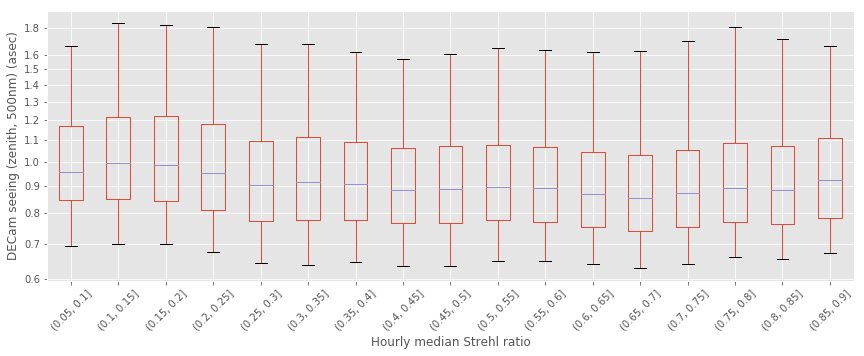

In [23]:
fig, ax = plt.subplots(1, figsize=(14, 5))
col = 'strehl_bin'
seeing_byhour.boxplot('decam', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_yscale('log')
ax.set_yticks(list(np.arange(0.6, 1.6, 0.1))+list(np.arange(1.6, 2.0, 0.2)))
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.minorticks_off()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("DECam seeing (zenith, 500nm) (asec)")
ax.set_xlabel("Hourly median Strehl ratio")
ax.set_title("")
fig.suptitle("")

Text(0.5, 0.98, '')

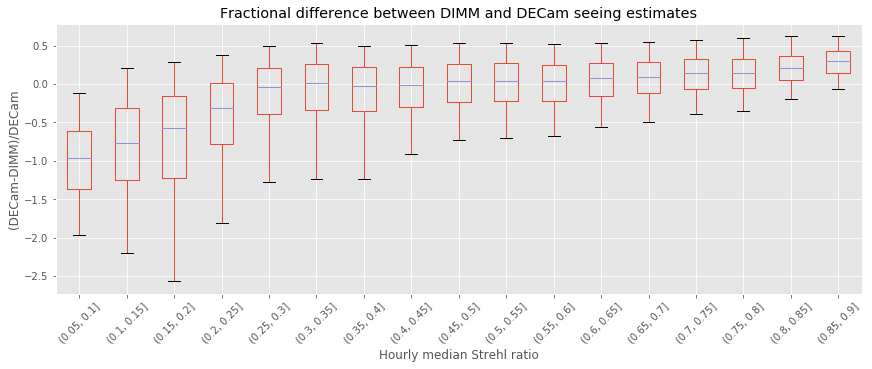

In [24]:
fig, ax = plt.subplots(1, figsize=(14, 5))
col = 'strehl_bin'
seeing_byhour.boxplot('frac_diff', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_xlabel("Strehl ratio")
ax.set_ylabel("Fractional difference in PSF width")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("(DECam-DIMM)/DECam")
ax.set_xlabel("Hourly median Strehl ratio")
ax.set_title("Fractional difference between DIMM and DECam seeing estimates")
fig.suptitle("")

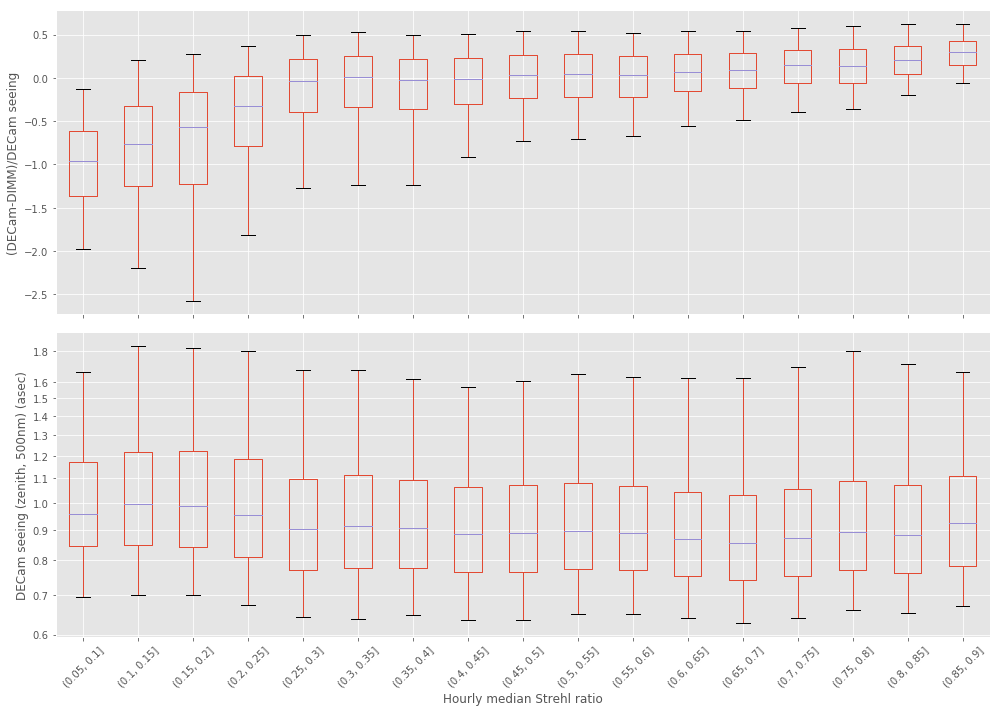

In [25]:
fig, axes = plt.subplots(2, figsize=(14, 10), sharex=True)
col = 'strehl_bin'

ax = axes[0]
seeing_byhour.boxplot('frac_diff', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_xlabel("Strehl ratio")
ax.set_ylabel("Fractional difference in PSF width")
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("(DECam-DIMM)/DECam seeing")
ax.set_xlabel("")
ax.set_title("")

ax = axes[1]
seeing_byhour.boxplot('decam', by=col, whis=[5, 95], showfliers=False, ax=ax)
ax.set_yscale('log')
ax.set_yticks(list(np.arange(0.6, 1.6, 0.1))+list(np.arange(1.6, 2.0, 0.2)))
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.minorticks_off()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
        
ax.set_ylabel("DECam seeing (zenith, 500nm) (asec)")
ax.set_xlabel("Hourly median Strehl ratio")
ax.set_title("")
fig.suptitle("")

plt.tight_layout()
fig.savefig(os.path.join(note_dir, 'strehl_boxplots.png'), pdi=300, bbox_inches='tight')

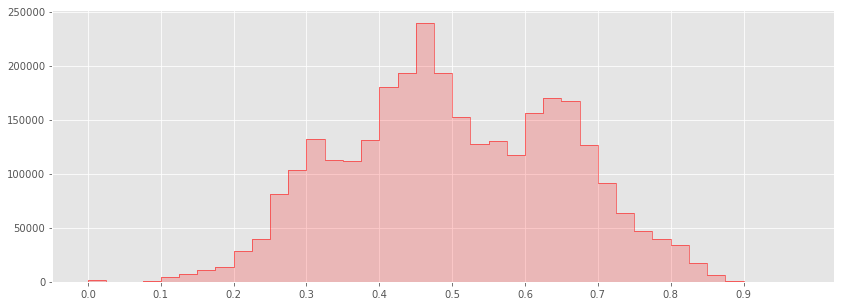

In [26]:
fig, ax = plt.subplots(1, figsize=(14, 5))
seeing_byhour.strehl.hist(bins=np.arange(0,1,0.025), histtype='step', color='r', ax=ax)
seeing_byhour.strehl.hist(bins=np.arange(0,1,0.025), alpha=0.2, color='r', ax=ax)
_ = ax.set_xticks(np.arange(0, 0.95, 0.1))
fig.savefig(os.path.join(note_dir, 'strehl_hist.png'), pdi=300, bbox_inches='tight')

## Look at Strehl ratio and other features

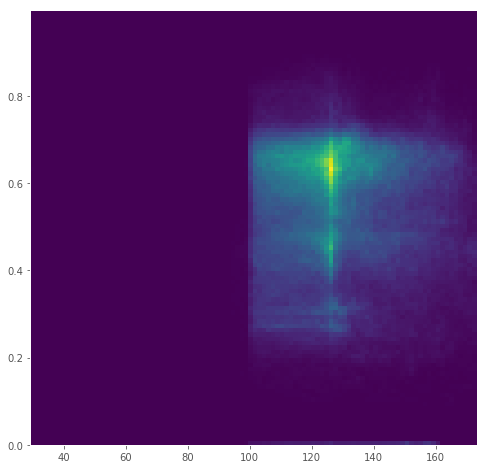

In [27]:
fig, ax = plt.subplots(1, figsize=(8, 8))
_ = ax.hist2d(dimm.solar_zd, dimm.strehl, bins=100)

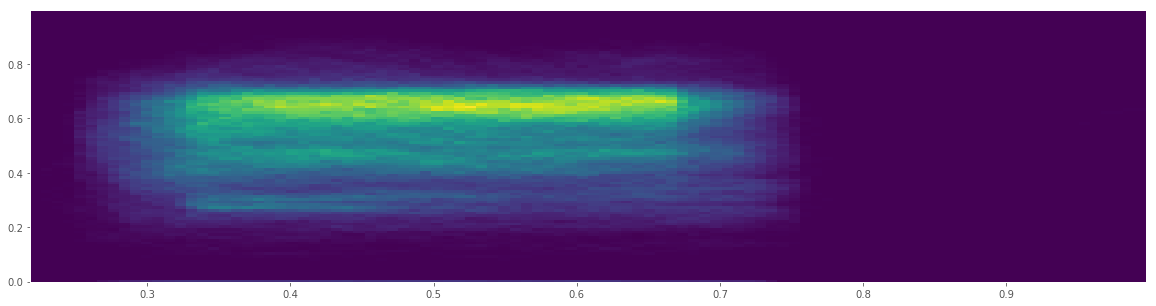

In [28]:
site_longitude_deg = EarthLocation.of_site('Cerro Pachon').lon.deg
site_night_shift = (180.0 + site_longitude_deg)/360.0
time_of_night = dimm.mjd + site_night_shift - np.floor(dimm.mjd + site_night_shift)
fig, ax = plt.subplots(1, figsize=(20, 5))
_ = ax.hist2d(time_of_night , dimm.strehl, bins=100)

## How do the Strehl ratios of the two different images compare?

/data/des70.a/data/neilsen/anaconda/envs/ehn37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6894: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


True

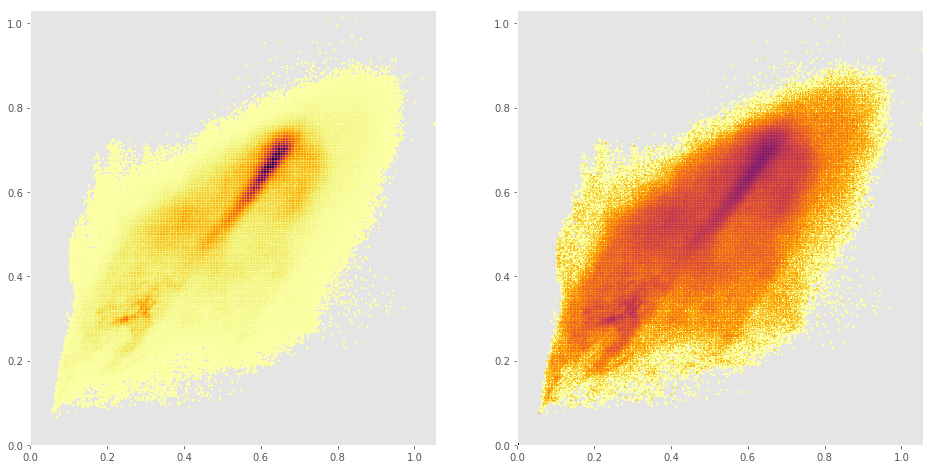

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].hist2d(dimm.strehlL, dimm.strehlR, bins=400, cmap='inferno_r', cmin=1, cmax=1000)
axes[1].hist2d(dimm.strehlL, dimm.strehlR, bins=400, norm=mpl.colors.LogNorm(), cmap='inferno_r')
True

# Plot nightly seeing

In [30]:
def plot_night_seeing(df, night, fig, axes):
    night_df = df[df.night == night]
    
    night_df.plot(y='log_r0', drawstyle='steps-mid',ax=axes)
    axes.set_ylim(axes.get_ylim()[::-1])

    # Add an axes with the DIMM measured seeing on the right
    right_axes = axes.twinx()
    night_df.plot(y='log_r0', drawstyle='steps-mid', ax=right_axes)

    seeing_ticks = np.concatenate((np.arange(0.4, 2.0, 0.2), np.arange(2.0, 4.0, 0.4)), axis=0)
    logr0_ticks = np.log10(0.98*5e-7/np.radians(seeing_ticks/(60*60)))
    right_axes.set_yticks(logr0_ticks)
    right_axes.set_yticklabels(f'{s:2.1f}"' for s in seeing_ticks)
    right_axes.set_ylabel('seeing')

    right_axes.set_ylim(axes.get_ylim())
    right_axes.grid(False)
    axes.set_ylabel("$\log(r_{0})$, $r_{0}$ in meters")
    
    axes.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%m:%SZ'))
    
    axes.legend().set_visible(False)
    right_axes.legend().set_visible(False)
    
    axes.set_title('Night MJD %d' % night)
    return fig, axes

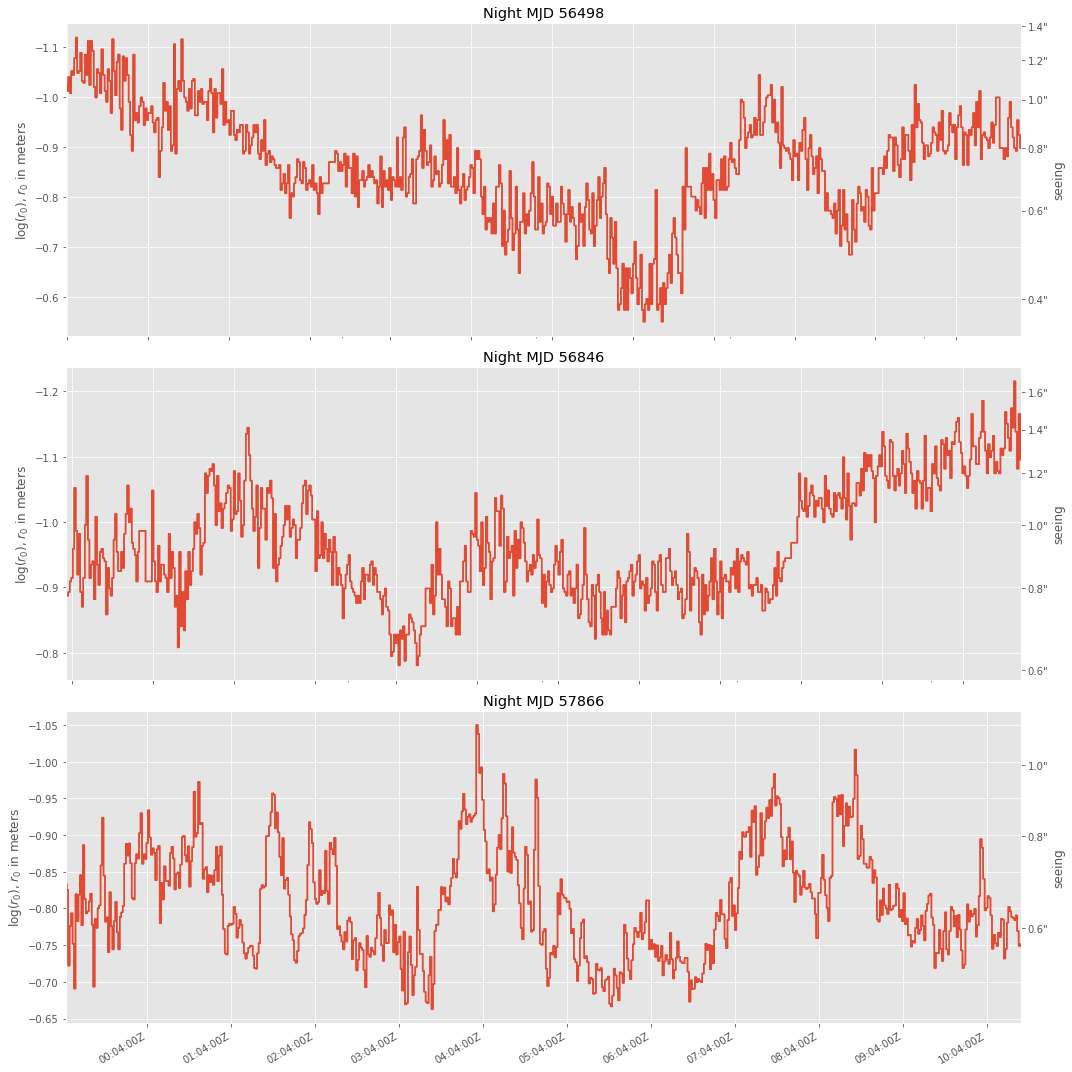

In [31]:
# Explicitly setting a seed make reproducability easier without having to rerun the whole notebook
np.random.seed(4861)

mpl.rcParams['figure.figsize'] = (15, 15)
fig, axes = plt.subplots(3,1)

# Pick some random nights during which the DIMM ran most of the night
sample_nights = dimm.groupby('night').agg({'fwhm': 'count'}).query('fwhm>600').sample(len(axes.flatten())).index.values
for ax, sample_night in zip(axes.flatten(), np.sort(sample_nights)):
    plot_night_seeing(dimm, sample_night, fig, ax)
    
axes[2].set_xlabel("")
plt.tight_layout()
fig.savefig(os.path.join(note_dir, 'random_nights_dimm'), pdi=300, bbox_inches='tight')